In [1]:
import pandas as pd 
import numpy as np 

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

: 

In [2]:
data= pd.read_excel('Telco_customer_churn.xlsx')

# Data Exploration

In [3]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
data.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [7]:
data.shape

(7043, 33)

In [8]:
data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

# Data Cleaning

## Duplication Check

In [9]:
data.duplicated().sum()
# No Duplication

np.int64(0)

## Null Filling

In [10]:
data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

### CustomerID

In [11]:
len(data['CustomerID'].unique())

7043

In [12]:
data['CustomerID'].dtype

dtype('O')

### Count

In [13]:
data['Count'].unique()

array([1])

In [14]:
data= data.drop('Count', axis= 1)

### Country

In [15]:
data['Country'].unique()

array(['United States'], dtype=object)

In [16]:
data= data.drop('Country', axis= 1)

### City

In [17]:
data['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], shape=(1129,), dtype=object)

In [18]:
len(data['City'].unique())

1129

In [19]:
data['City'].value_counts().sort_values()

City
Caliente           4
Big Pine           4
Lakeport           4
Hopland            4
Graton             4
                ... 
San Francisco    104
Sacramento       108
San Jose         112
San Diego        150
Los Angeles      305
Name: count, Length: 1129, dtype: int64

### Zip Code

In [20]:
data['Zip Code'].unique()

array([90003, 90005, 90006, ..., 96128, 96134, 96146], shape=(1652,))

In [21]:
data= data.drop('Zip Code', axis= 1)

### Longitude

In [22]:
data['Longitude'].unique()

array([-118.272783, -118.30742 , -118.293953, ..., -120.386422,
       -121.492666, -120.212401], shape=(1651,))

In [23]:
data['Longitude'].dtype

dtype('float64')

### Lat Long

In [24]:
data['Lat Long'].unique()

array(['33.964131, -118.272783', '34.059281, -118.30742',
       '34.048013, -118.293953', ..., '40.346634, -120.386422',
       '41.813521, -121.492666', '39.191797, -120.212401'],
      shape=(1652,), dtype=object)

In [25]:
data['Latitude']= [item.split(',')[0] for item in data['Lat Long']]
data['Latitude']

0       33.964131
1       34.059281
2       34.048013
3       34.062125
4       34.039224
          ...    
7038    34.341737
7039    34.667815
7040    34.559882
7041      34.1678
7042    34.424926
Name: Latitude, Length: 7043, dtype: object

In [26]:
data['Latitude']= data['Latitude'].astype(float)

In [27]:
data= data.drop('Lat Long', axis=1)

### Gender                  

In [28]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [29]:
data['Gender'].value_counts()

Gender
Male      3555
Female    3488
Name: count, dtype: int64

### Senior Citizen

In [30]:
data['Senior Citizen'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
data['Senior Citizen'].value_counts()

Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64

### Partner

In [32]:
data['Partner'].unique()

array(['No', 'Yes'], dtype=object)

In [33]:
data['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

### Dependents

In [34]:
data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
data['Dependents'].value_counts()

Dependents
No     5416
Yes    1627
Name: count, dtype: int64

### Tenure Months

In [36]:
data['Tenure Months'].unique()

array([ 2,  8, 28, 49, 10,  1, 47, 17,  5, 34, 11, 15, 18,  9,  7, 12, 25,
       68, 55, 37,  3, 27, 20,  4, 58, 53, 13,  6, 19, 59, 16, 52, 24, 32,
       38, 54, 43, 63, 21, 69, 22, 61, 60, 48, 40, 23, 39, 35, 56, 65, 33,
       30, 45, 46, 62, 70, 50, 44, 71, 26, 14, 41, 66, 64, 29, 42, 67, 51,
       31, 57, 36, 72,  0])

In [37]:
data['Tenure Months'].value_counts().sort_values()

Tenure Months
0      11
36     50
44     51
39     56
28     57
     ... 
4     176
3     200
2     238
72    362
1     613
Name: count, Length: 73, dtype: int64

In [38]:
data['Tenure Months'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure Months, dtype: float64

### Phone Service

In [39]:
data['Phone Service'].unique()

array(['Yes', 'No'], dtype=object)

In [40]:
data['Phone Service'].value_counts()

Phone Service
Yes    6361
No      682
Name: count, dtype: int64

### Multiple Lines

In [41]:
data['Multiple Lines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [42]:
data['Multiple Lines'].value_counts()

Multiple Lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

### Internet Service

In [43]:
data['Internet Service'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [44]:
data['Internet Service'].value_counts()

Internet Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

### Online Security

In [45]:
data['Online Security'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

### Online Backup

In [46]:
data['Online Backup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

### Device Protection

In [47]:
data['Device Protection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

### Tech Support

In [48]:
data['Tech Support'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

### Streaming TV

In [49]:
data['Streaming TV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

### Streaming Movies

In [50]:
data['Streaming Movies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

### Contract

In [51]:
data['Contract'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [52]:
data['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

### Paperless Billing

In [53]:
data['Paperless Billing'].unique()

array(['Yes', 'No'], dtype=object)

### Payment Method

In [54]:
data['Payment Method'].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

### Monthly Charges

In [55]:
data['Monthly Charges'].unique()

array([ 53.85,  70.7 ,  99.65, ..., 108.35,  63.1 ,  78.7 ], shape=(1585,))

In [56]:
data['Monthly Charges'].dtype

dtype('float64')

In [57]:
data['Monthly Charges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Monthly Charges, dtype: float64

### Total Charges

In [58]:
data['Total Charges'].unique()

array([108.15, 151.65, 820.5, ..., 7362.9, 346.45, 6844.5],
      shape=(6531,), dtype=object)

In [59]:
data['Total Charges'].value_counts()

Total Charges
          11
20.2      11
19.75      9
19.9       8
20.05      8
          ..
1419.4     1
1990.5     1
7362.9     1
346.45     1
820.5      1
Name: count, Length: 6531, dtype: int64

In [60]:
data['Total Charges']= data['Total Charges'].replace(' ', np.nan)

C:\Users\hp\AppData\Local\Temp\ipykernel_5160\1797876287.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Total Charges']= data['Total Charges'].replace(' ', np.nan)


In [61]:
data[data['Total Charges'].isna()]

,CustomerID,State,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,California,San Bernardino,34.084909,-117.258107,Female,No,Yes,No,0,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,California,Independence,36.869584,-118.189241,Male,No,No,No,0,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,California,San Mateo,37.590421,-122.306467,Female,No,Yes,No,0,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,California,Cupertino,37.306612,-122.080621,Male,No,Yes,Yes,0,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,California,Redcrest,40.363446,-123.835041,Female,No,Yes,No,0,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,California,Los Angeles,34.089953,-118.294824,Male,No,Yes,Yes,0,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,California,Sun City,33.739412,-117.173334,Male,No,Yes,Yes,0,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,California,Ben Lomond,37.078873,-122.090386,Female,No,Yes,Yes,0,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,California,La Verne,34.144703,-117.770299,Male,No,Yes,Yes,0,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,California,Bell,33.970343,-118.171368,Female,No,Yes,Yes,0,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


In [62]:
data['Total Charges']= data['Total Charges'].fillna(0)

In [63]:
data['Total Charges']= data['Total Charges'].astype(float)

In [64]:
data['Total Charges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: Total Charges, dtype: float64

### Churn Label

In [65]:
data['Churn Label'].unique()

array(['Yes', 'No'], dtype=object)

In [66]:
data['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

### Churn Value

In [67]:
data['Churn Value'].unique()

array([1, 0])

In [68]:
data['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [69]:
data= data.drop('Churn Label', axis= 1)

### Churn Score

In [70]:
data['Churn Score'].unique()

array([ 86,  67,  84,  89,  78, 100,  92,  77,  97,  74,  66,  65,  70,
        90,  82,  69,  81,  96,  87,  88,  75,  76,  95,  99,  80,  73,
        94,  83,  98,  71,  85,  68,  91,  93,  72,  79,  27,  61,  43,
        51,  58,  39,  35,  57,  53,  21,  38,  40,  41,  22,  25,  64,
        49,  62,  52,  59,  29,  33,  20,  30,  26,  54,  56,  55,  28,
        37,   9,  60,  24,  63,  23,  47,  32,   8,  46,  42,  48,  36,
        34,   7,  50,  44,  31,   5,  45])

In [71]:
data['Churn Score'].describe()

count    7043.000000
mean       58.699418
std        21.525131
min         5.000000
25%        40.000000
50%        61.000000
75%        75.000000
max       100.000000
Name: Churn Score, dtype: float64

### CLTV

In [72]:
data['CLTV'].unique()

array([3239, 2701, 5372, ..., 2770, 4645, 5553], shape=(3438,))

In [73]:
data['CLTV'].describe()

count    7043.000000
mean     4400.295755
std      1183.057152
min      2003.000000
25%      3469.000000
50%      4527.000000
75%      5380.500000
max      6500.000000
Name: CLTV, dtype: float64

### Churn Reason

In [74]:
data['Churn Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [75]:
data['Churn Reason'].isnull().sum()

np.int64(5174)

## Outliers Handling

In [76]:
numeric= list(data.describe().columns)
numeric

['Latitude',
 'Longitude',
 'Tenure Months',
 'Monthly Charges',
 'Total Charges',
 'Churn Value',
 'Churn Score',
 'CLTV']

In [77]:
def find_outliers_iqr(data):
    outliers= []
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        if (data[col] < lower_bound).any() | (data[col] > upper_bound).any():
            outliers.append(col)
    return outliers

In [78]:
outliers_columns= find_outliers_iqr(data[numeric])
outliers_columns

[]

## Correlation Check

In [79]:
numeric = list(data.describe().columns)
numeric

['Latitude',
 'Longitude',
 'Tenure Months',
 'Monthly Charges',
 'Total Charges',
 'Churn Value',
 'Churn Score',
 'CLTV']

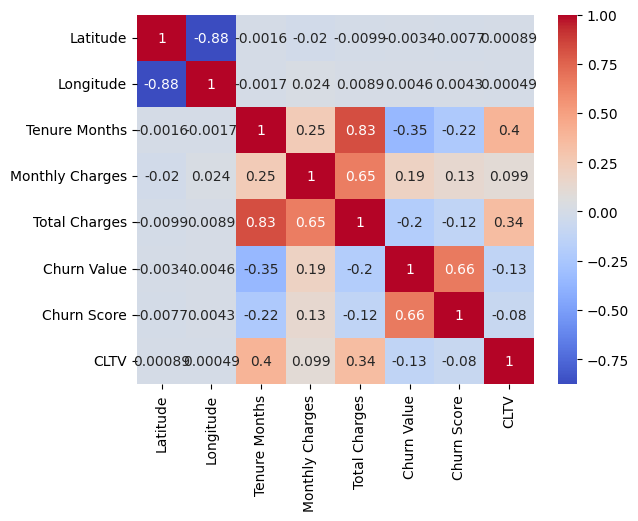

In [80]:
sns.heatmap(data[numeric].corr(), cmap= 'coolwarm', annot= True)
plt.show()

In [83]:
data.head()

,CustomerID,State,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,California,Los Angeles,33.964131,-118.272783,Male,No,No,No,2,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,9237-HQITU,California,Los Angeles,34.059281,-118.307420,Female,No,No,Yes,2,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved
2,9305-CDSKC,California,Los Angeles,34.048013,-118.293953,Female,No,No,Yes,8,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372,Moved
3,7892-POOKP,California,Los Angeles,34.062125,-118.315709,Female,No,Yes,Yes,28,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved
4,0280-XJGEX,California,Los Angeles,34.039224,-118.266293,Male,No,No,Yes,49,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340,Competitor had better devices


In [84]:
data.to_csv('Cleaned_ML.csv')